<a href="https://colab.research.google.com/github/AlishbaFatima12/deep_learning/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Dictionary**
age: age in years
sex: sex
1 = male
0 = female
cp: chest pain type
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl)
1 = true;
0 = false
restecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina
1 = yes
0 = no
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
Value 0: upsloping
Value 1: flat
Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal:
0 = error (in the original dataset 0 maps to NaN's)
1 = fixed defect
2 = normal
3 = reversable defect
target (the lable):
0 = no disease,
1 = disease
Note on the target label:

Diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing
Value 1: > 50% diameter narrowing

Notes from the discussion forum of the dataset:

data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.
Action: Drop the faulty data! (7 data entry will be dropped)


In [2]:
# 1️⃣ Upload kaggle.json (your API key)
from google.colab import files
files.upload()  # select your kaggle.json when prompted

# 2️⃣ Set up Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 3️⃣ Download the dataset using Kaggle API
!kaggle datasets download -d data855/heart-disease

# 4️⃣ Unzip the dataset
!unzip -o heart-disease.zip

# 5️⃣ Inspect directory to find CSV files
!ls

# 6️⃣ Load the CSV into Pandas
import pandas as pd

# Replace 'heart.csv' if the filename is different
df = pd.read_csv('heart.csv')
df.head()
df.info()


Saving heart.csv to heart.csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open heart-disease.zip, heart-disease.zip.zip or heart-disease.zip.ZIP.
heart.csv  sample_data
<class '

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Represents dimension of dataset #rows = 303, columns = 14
df.shape

(303, 14)

In [5]:
#check for null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
# Keep only rows where ca is between 0 and 3 (inclusive)
df = df[(df['ca'] >= 0) & (df['ca'] <= 3)]


In [7]:
df.shape # rows reduced from 303 to 298

(298, 14)

In [8]:
# to delete rows in which the value of that is equal to zero.
df = df[(df['thal'] != 0)]

In [9]:
df.shape #after pre-processing: rows left = 296, columns left = 14

(296, 14)

In [10]:
data = df.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [11]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

/tmp/ipython-input-11-2966579873.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['sex'][data['sex'] == 0] = 'female'
/tmp/ipython-input-11-2966579873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [12]:
data.dtypes

,0
age,int64
sex,object
chest_pain_type,object
resting_blood_pressure,int64
cholesterol,int64
fasting_blood_sugar,object
resting_electrocardiogram,object
max_heart_rate_achieved,int64
exercise_induced_angina,object
st_depression,float64


In [13]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


As we have seen above there are three datatypes i.e object, int and floats. **Let's group them according to type.**

In [14]:
# numerical fearures ( any number)
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary 0 or 1)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-class (0,1,2,3..))
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

/tmp/ipython-input-15-1995647111.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=data, palette=colors)  # Count plot for 'target' column using custom colors


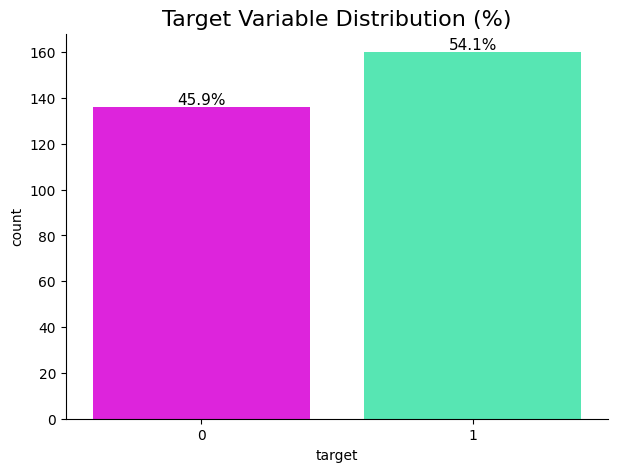

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Custom colors for each bar
colors = ['#FC05FB', '#3FFEBA']  # You can add more if there are more unique values

# Create the plot
plt.figure(figsize=(7, 5))  # Set the size of the figure
ax = sns.countplot(x='target', data=data, palette=colors)  # Count plot for 'target' column using custom colors

# Add percentage labels on top of each bar
total = len(data)  # Total number of rows
for p in ax.patches:
    percentage = (p.get_height()/ total) * 100  # Calculate percentage of each bar
    ax.annotate(f'{percentage:.1f}%',  # Format as 1 decimal float + %
                (p.get_x() + p.get_width() / 2 , p.get_height()+1),  # Position above the bar
                ha='center', fontsize=11)  # Center align, set font size

# Add a title
ax.set_title('Target Variable Distribution (%)', fontsize=16)

# Remove the top and right axis lines for a cleaner look
sns.despine()

# Show the plot
plt.show()


In [16]:
#to describe numerical data: finding mean,std etc
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


Distribution Plot

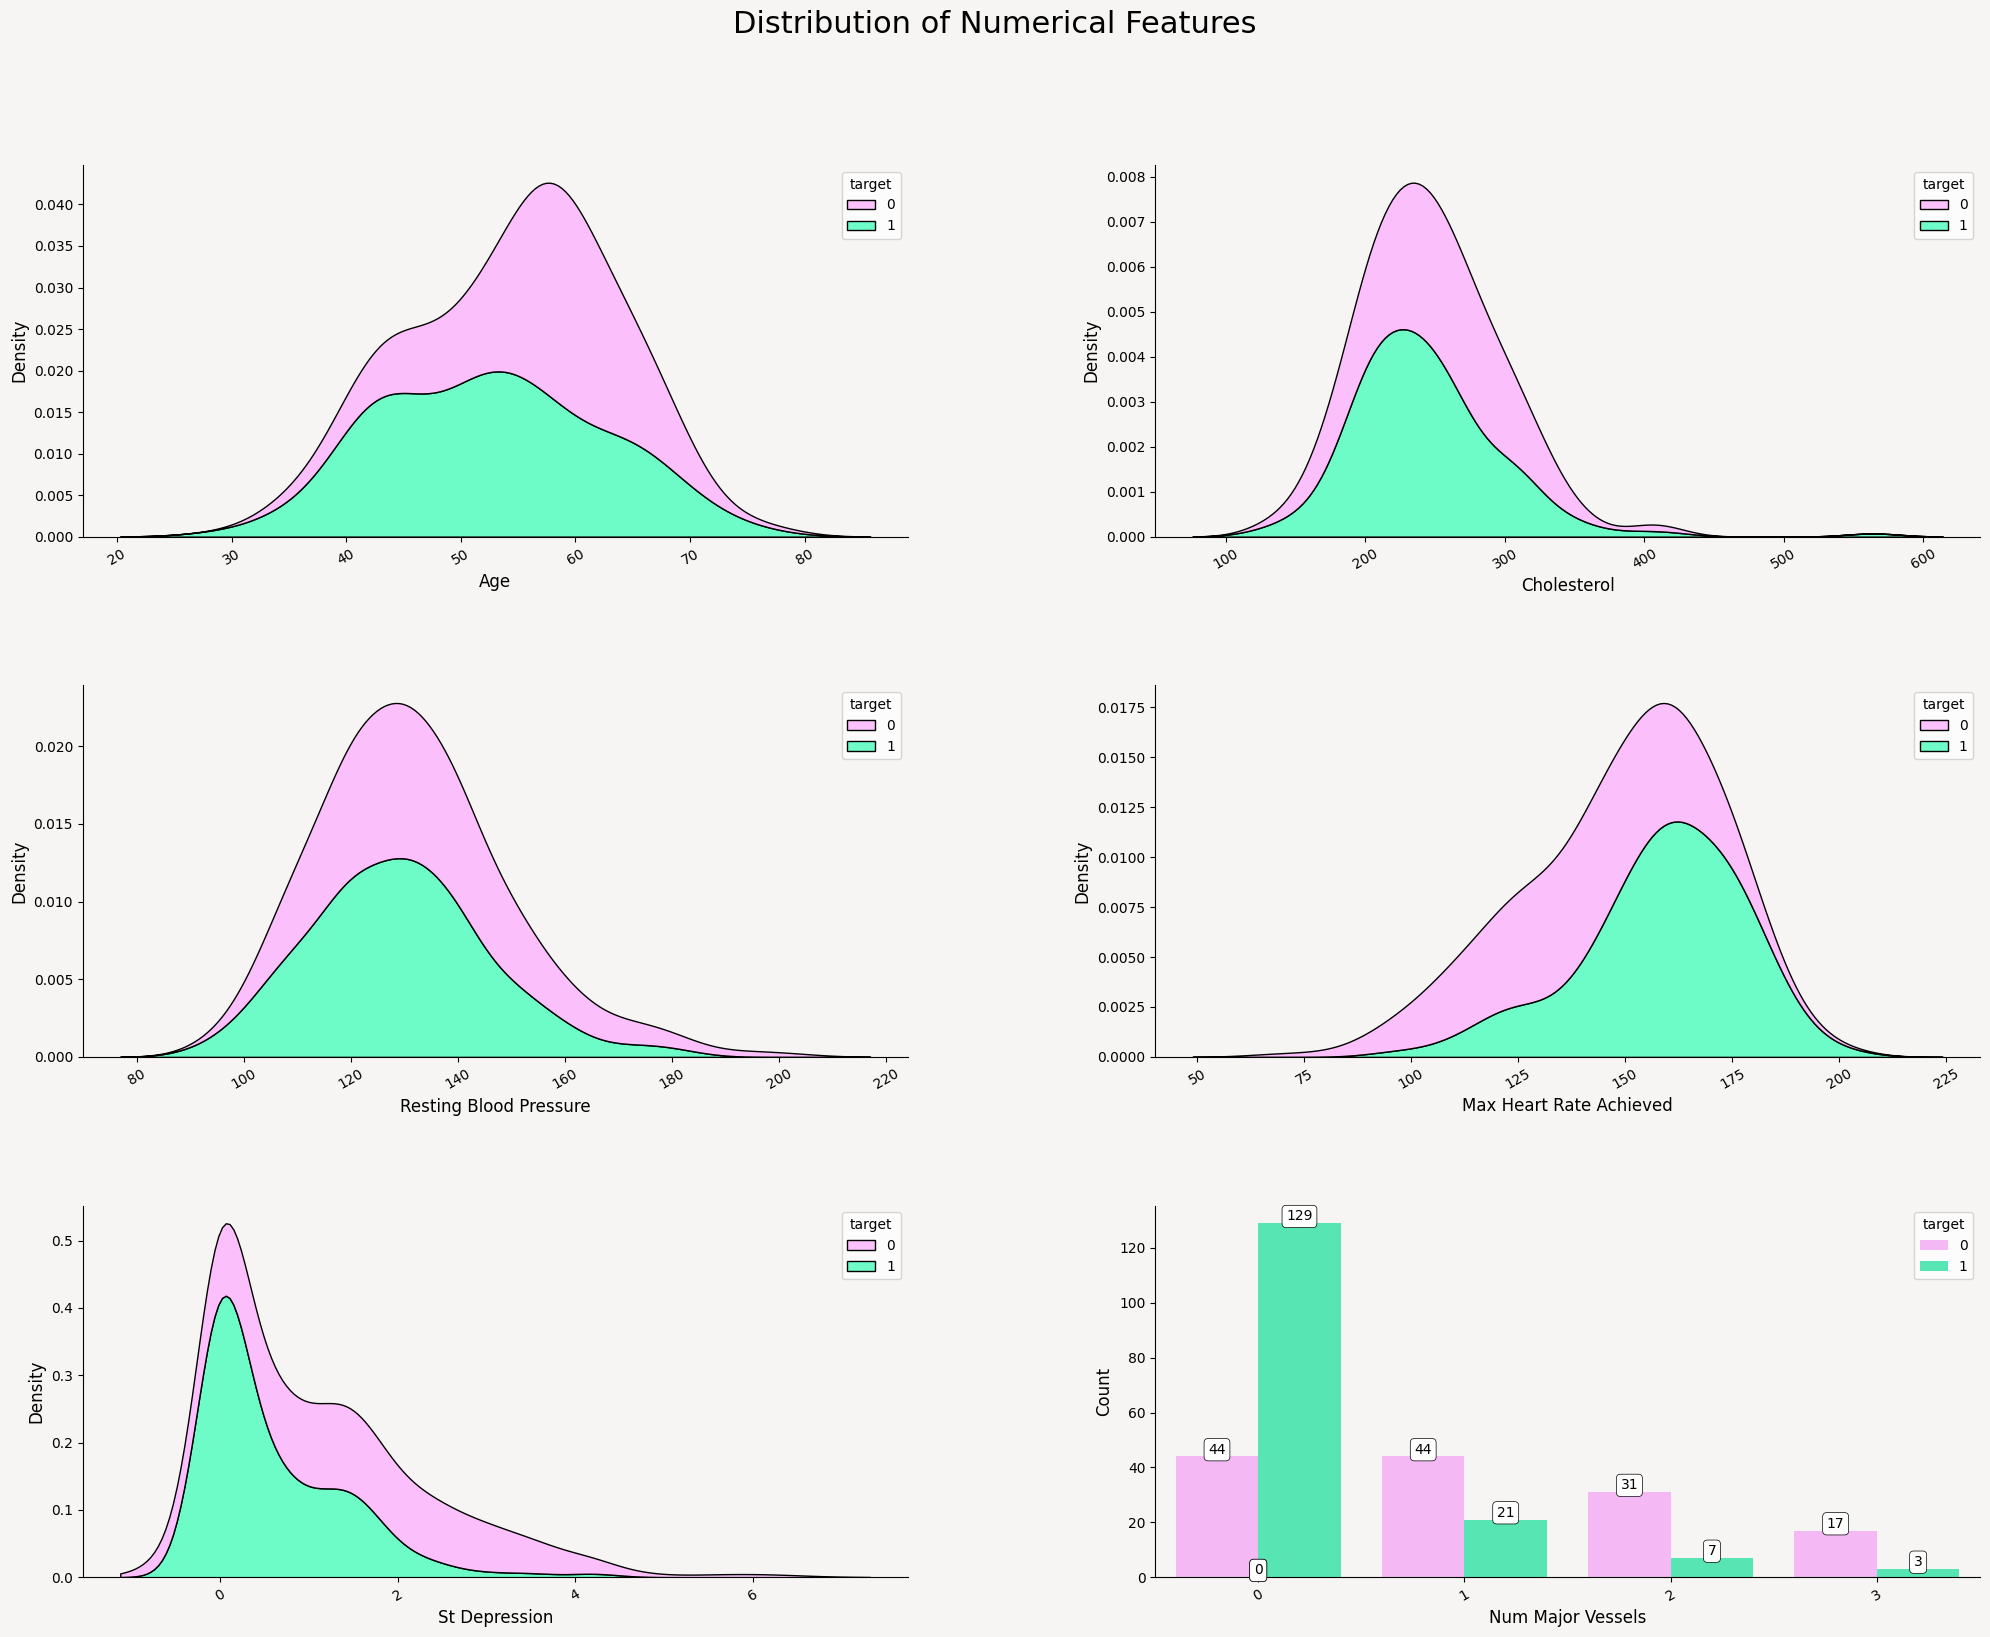

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC', '#F3FEFA', '#B4FFE4', '#3FFEBA']

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 16), facecolor='#F6F5F4')
axes = axes.flatten()  # Make it 1D list for easy indexing

for i, col in enumerate(num_feats):
    ax = axes[i]
    ax.set_facecolor('#F6F5F4')

    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4], ax=ax)
        ax.set_ylabel("Count", fontsize=12)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.0f}',
                    ha="center", fontsize=10,
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', linewidth=0.5))
    else:
        sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4], ax=ax, fill=True)
        ax.set_ylabel("Density", fontsize=12)

    ax.set_xlabel(col.replace("_", " ").title(), fontsize=12)
    ax.tick_params(axis='x', rotation=30)  # Clearer rotation
    ax.tick_params(axis='both', labelsize=10)
    sns.despine(ax=ax)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Numerical Features', fontsize=22, y=1.02)

# Adjust spacing properly to avoid merging
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()


# **Pair-plots**

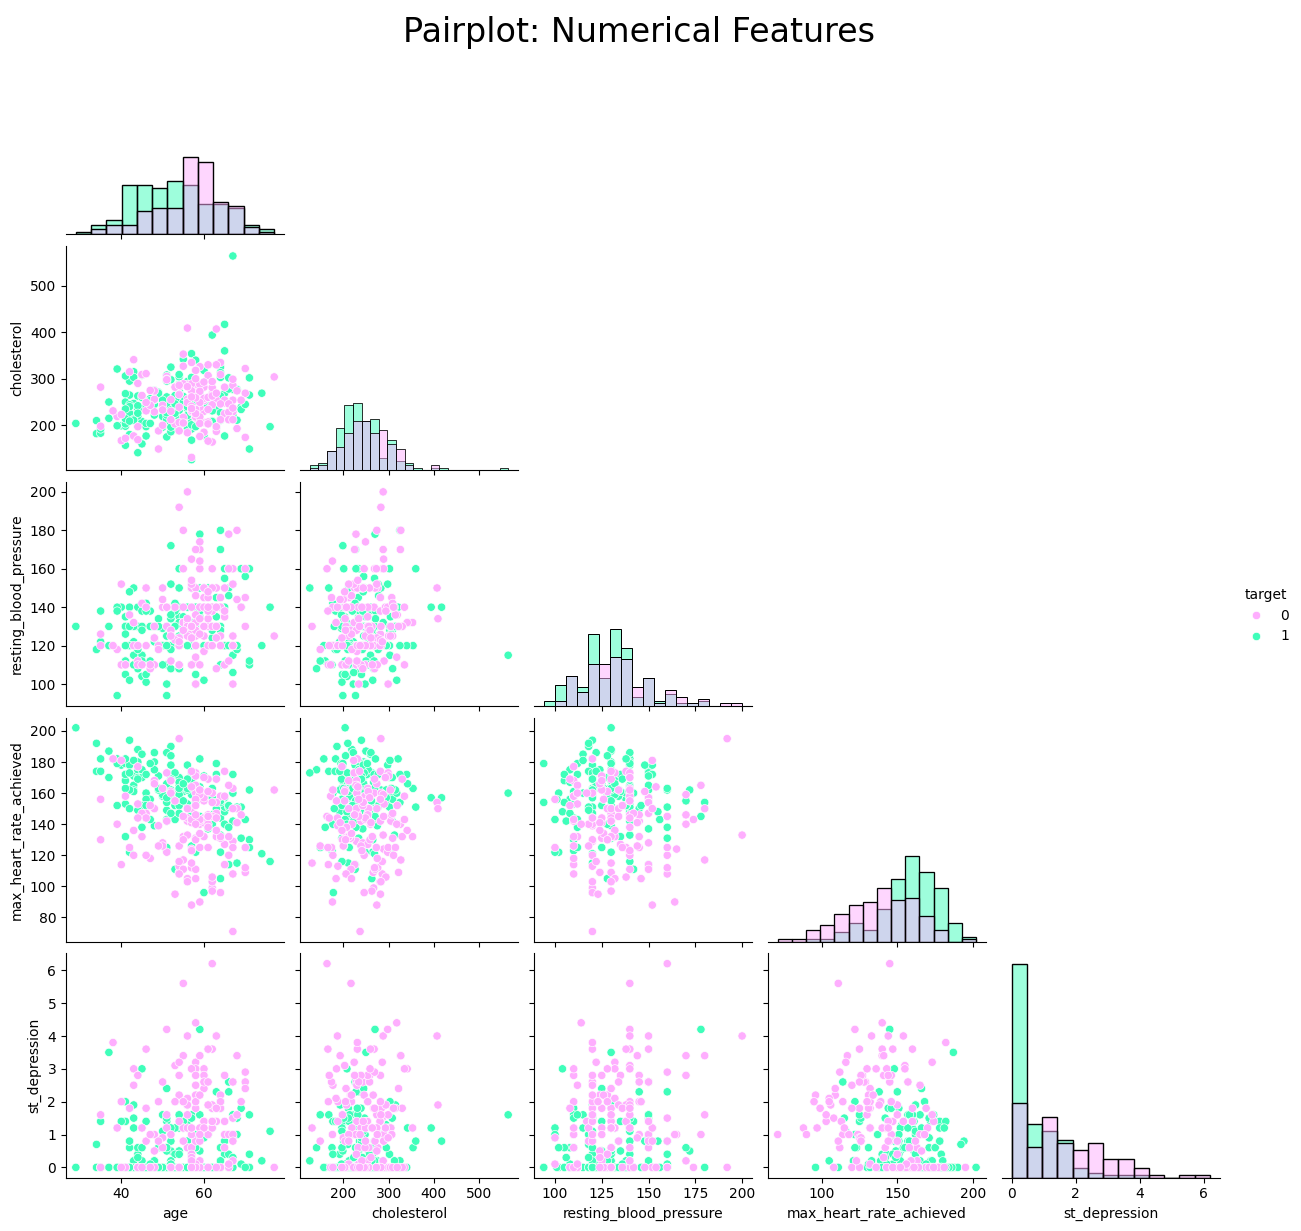

In [18]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = data[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

# **REG PLOTS OF SELECTED FEATURES**

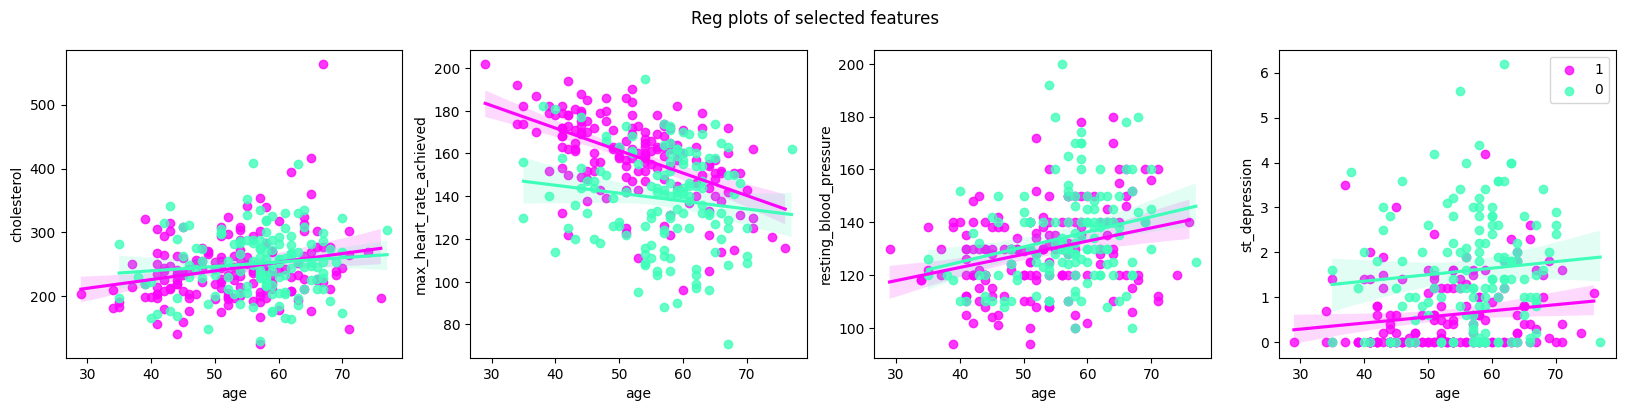

In [19]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

# **Distribution: Count plots**
We use a count plot to visualize the different categories with respect to the target variable. Two things we could take note of are the distribution of each category in the dataset and their contribution to the probability of correct prediction of the target variable, i.e has disease (=1) or has no disease (=0). Below is the summary of the categorical features. Chest Pain: More than 75% of the patients experience either typical angina or non-angina chest pain. Patients who experienced atypical angina or non-angina chest pain are more likely to have a heart disease. Resting Electrocardiogram: Patients with Left ventricular hypertrophy are the fewest (1.4%). The rest is almost a 50-50 split between patients with ST-T abnormality and those with normal REC tests. ST-T abnormality seem to have a better correlation with the target, i.e the majority of patients with this kind of REC test ended up with a heart disease. ST-Slope: Most patients have a downsloping or flat ST-Slope of their REC test. downsloping ST-Slopes are a strong indication that a patient might have a heart disease. Thalassemia: Most patients have a normal or reversable defect Patients who have thalassemia defects (reversable + fixed) are less likely to have a heart disease. Whereas, those with normal thalassemia are more likely to have a heart condition. Sounds not intuitive. Fasting blood sugar Patients with lower (less than 120mg/ml) fasting blood sugar are the majority in our dataset consisting of ~85% of the sample. Having lower resting blood sugar tends to increase the chances (54%) of a heart disease. Exercise Induced Angina Two-third of the patients showed no exercise induced angina. 76% of the patients with exercise induced angina had no heart conditions. Whereas ~69% of the patients who did not experience exercise induced angina were diagnosed with heart condition. Sex More patients in the sample data are male. Females seem to suffer from heart condition more than males.

/tmp/ipython-input-22-38482809.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=15, ha='right')
/tmp/ipython-input-22-38482809.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=15, ha='right')
/tmp/ipython-input-22-38482809.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=15, ha='right')
/tmp/ipython-input-22-38482809.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=15, ha='right')
/tmp/ipython-input-22-38482809.py:27: UserWarnin

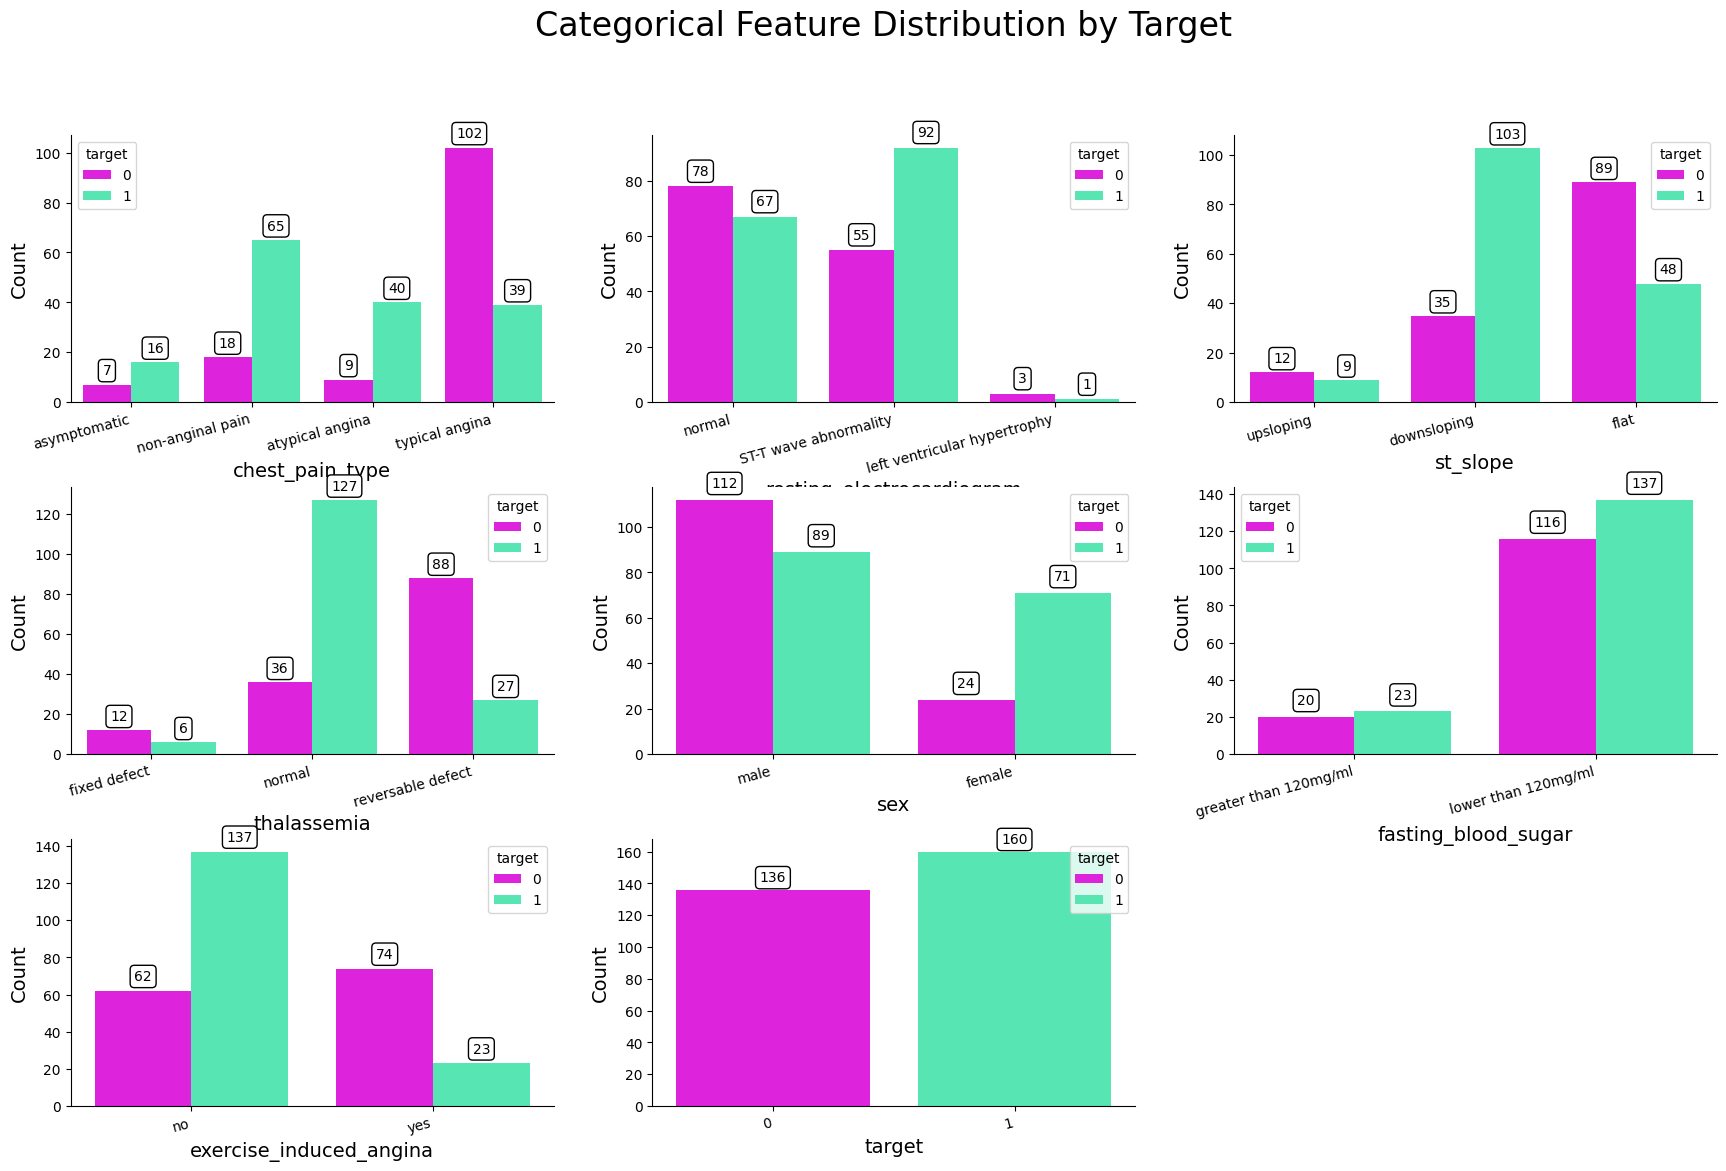

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Your palette and categorical feature list
mypal = sns.color_palette("husl")

# Set number of rows and columns for subplot layout
ncol = 3
nrow = math.ceil(len(cat_feats) / ncol)

# Create subplots
fig, ax = plt.subplots(nrow, ncol, figsize=(18, 12), facecolor='white')
fig.suptitle('Categorical Feature Distribution by Target', fontsize=24)
fig.tight_layout(pad=4.0)
custom_palette = ['#FC05FB', '#3FFEBA']
# Flatten axes for easier indexing
ax = ax.flat

# Plot loop
for i, col in enumerate(cat_feats):
    axis = ax[i]
    sns.countplot(data=data, x=col, hue="target", palette=custom_palette, ax=axis)

    axis.set_xlabel(col, fontsize=14)
    axis.set_ylabel("Count", fontsize=14)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=15, ha='right')
    sns.despine(ax=axis)

    # Annotate bars
    for p in axis.patches:
        height = p.get_height()
        if height > 0:
            axis.text(p.get_x() + p.get_width() / 2.,
                      height + data[col].value_counts().max() * 0.02,
                      f'{int(height)}',
                      ha="center",
                      va="bottom",
                      fontsize=10,
                      bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Hide any extra subplots if len(cat_feats) < ncol*nrow
for j in range(len(cat_feats), ncol * nrow):
    fig.delaxes(ax[j])

plt.show()


# **Pearson's correlation**
The Pearson correlation coefficient ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1.

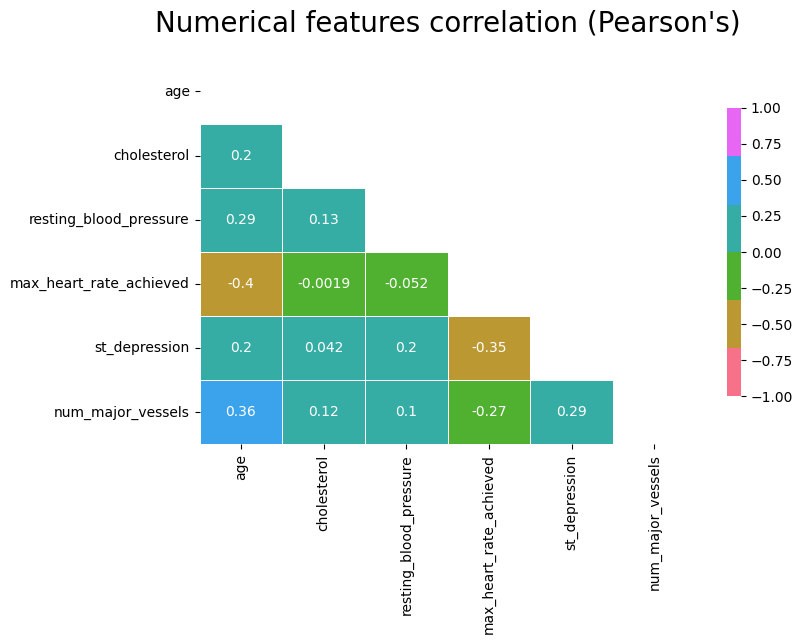

In [24]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask = mask,cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y =1.05);

# **Point biserial correlation**
A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable. It is a special case of the Pearson’s product-moment correlation, which is applied when you have two continuous variables, whereas in this case one of the variables is measured on a dichotomous scale.


The **Point-Biserial Correlation** is a **special case of Pearson correlation** that is used when:
u're absolutely right —
* **One variable is continuous** (e.g., age, cholesterol, blood pressure).
* **One variable is dichotomous** (i.e., binary: only two categories, like 0 and 1 — for example, "has disease" vs "no disease").

---

### ✅ What is Point-Biserial Correlation?

It is a statistical technique used to measure the **strength and direction** of the relationship between:

* A **numerical** (continuous) variable, and
* A **binary** (categorical with two classes) variable.

---

### 🧠 Intuition:

* It helps us understand **whether the mean of the continuous variable is different for the two groups** defined by the binary variable.

For example:

* Let's say you're analyzing the relationship between **cholesterol level (continuous)** and **heart disease presence (target = 0 or 1)**.
* A **strong positive point-biserial correlation** would indicate that **higher cholesterol is associated with having heart disease**.
* A **negative correlation** would mean **higher cholesterol is associated with not having the disease**.



### 📈 How is it related to Pearson?

Even though it deals with a binary variable, point-biserial correlation is **mathematically equivalent** to computing the **Pearson correlation** between a continuous variable and a binary variable coded as 0 and 1.

So if you compute:

```python
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(data['target'], data['cholesterol'])
```

It gives the same result as:

```python
data[['target', 'cholesterol']].corr().iloc[0,1]
```

(because `target` is 0/1)

---

### 📌 Use Cases:

| Continuous Variable | Binary Variable     | Question Answered                                      |
| ------------------- | ------------------- | ------------------------------------------------------ |
| Age                 | Heart Disease (0/1) | Is age related to likelihood of heart disease?         |
| Cholesterol         | Diabetes (0/1)      | Does cholesterol differ between diabetic/non-diabetic? |
| Blood Pressure      | Smoker (Yes=1/No=0) | Do smokers have higher blood pressure?                 |

---



* Use **Point-Biserial** when one variable is continuous and the other is binary.
* It tells you how **strongly the binary label splits the continuous data**.
* Under the hood, it’s just a **Pearson correlation with 0/1 coding**.
**But here:we're passing any two features — so technically we're using point-biserial correlation on all combinations, even continuous–continuous pairs.**


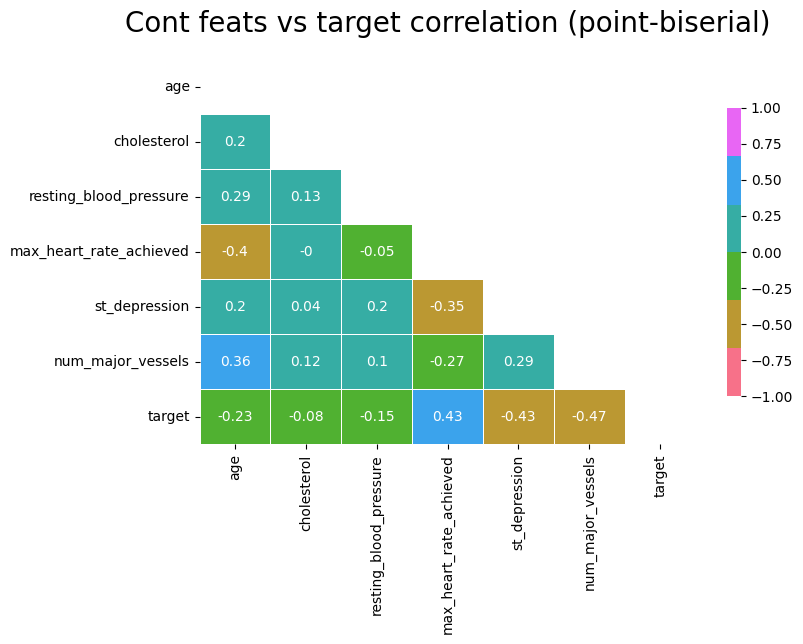

In [26]:
from scipy import stats

feats_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y])
        col.append(round(pbs,2))
    rows.append(col)

pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Cont feats vs target correlation (point-biserial)", fontsize=20, y= 1.05);


# **✅ When is it correct?**
**The most valid use is when y = 'target' (which is binary) and x is continuous.

You could rewrite your loop like this to only compute correlation vs the target:**

In [27]:
import pandas as pd
from scipy import stats

# Continuous features list (excluding target)
feats_cont = ['age', 'cholesterol', 'resting_blood_pressure',
              'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# Binary target variable
target = data['target']

# Dictionary to store results
results = {}

# Loop through each continuous feature and calculate point-biserial correlation
for feat in feats_cont:
    r, p = stats.pointbiserialr(data[feat], target)
    results[feat] = round(r, 2)

# Convert to a DataFrame for better visualization
pbs_df = pd.DataFrame.from_dict(results, orient='index', columns=['Point-Biserial Corr'])

# Display
print(pbs_df)


                         Point-Biserial Corr
age                                    -0.23
cholesterol                            -0.08
resting_blood_pressure                 -0.15
max_heart_rate_achieved                 0.43
st_depression                          -0.43
num_major_vessels                      -0.47


# **📌 What is Cramér’s V?**
Cramér’s V is a statistical measure used to assess the strength of association between two categorical (nominal) variables.

Range: 0 (no association) to 1 (perfect association)

Symmetric: The value is the same regardless of the order of the variables.

Based on the Chi-Square test of independence.

🧮 Cramér's V Formula
𝑉
=
𝜒
2
𝑛
⋅
(
𝑘
−
1
)
V=
n⋅(k−1)
χ
2

​

​

𝜒
2
χ
2
 : Chi-square statistic

𝑛
n: Total number of observations

𝑘
k: Minimum of number of rows or columns

✅ When to Use Cramér's V?
Use it when:

You have two categorical variables

You want to check the strength of relationship, not just significance

The variables have more than two categories

💡 Example Use Case
You're analyzing a dataset with:

gender (male, female)

target (disease, no disease)

To see how strongly gender is associated with heart disease, you can apply Cramér’s V.



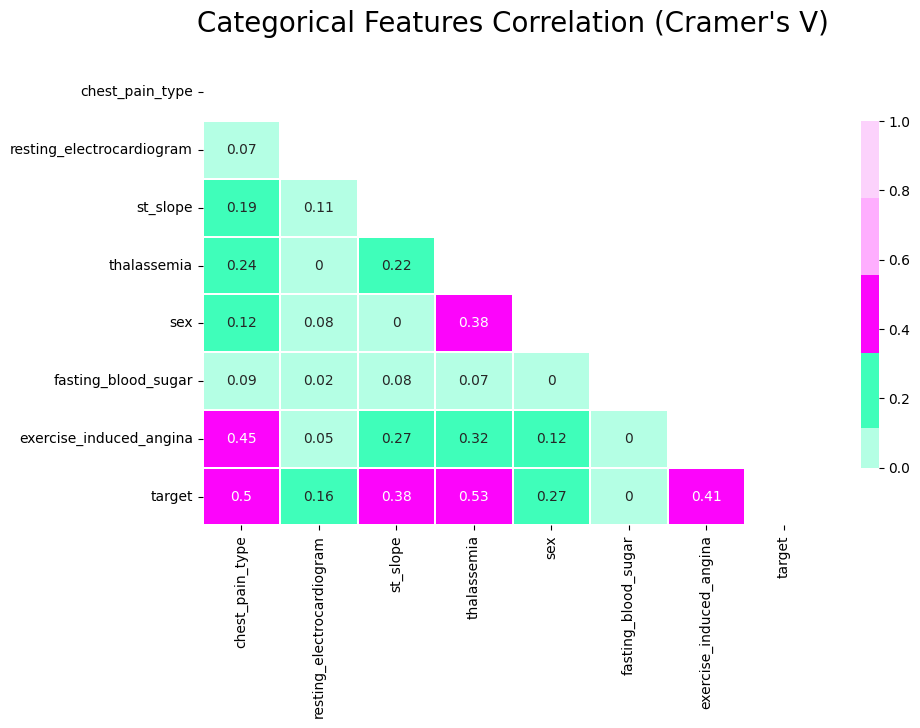

In [28]:
 #the cramers_v function is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y])
        col.append(round(cramers,2))
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# color palette
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);

# **EDA Summary: **
Data size: 303 rows and 14 columns (13 independent + one target variable) > later reduced to 296 after removing faulty data points!
Data has no missing values
Features (columns) data type:
Six features are numerical
The rest (seven features) are categorical variables
Target variable is fairly balanced, 54% no-disease to 46% has-disease
Correlations:
Correlation between features is weak at best
From the numerical features num_major_vessels, max_heart_rate_achieved and st_depression are reasonabily fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively.
From the categorical features chest_pain_type, num_major_vessels, thalassemia, and exercise_induced_angina are better correlated with the target variable, thalassemia being the highest at 0.52.
Cholestrol (to my surprize, but what do I know?) has less correlation with heart desease.
Takeaway: features that have higher predictive power could be, chest_pain_type, num_major_vessels, thalassemia, exercise_induced_angina max_heart_rate_achieved and st_depression. We will see which features will appear as imporatnt by the classification models.

# **Scikit Learn Classifiers **
This is a binary classification problem (has-disease or no-disease cases). Scikit learn offers a wide range of classification algorithms and is often the starting point in most/traditional machine learning challenges, so we start by exploring few of the classification alorithms from the sklearn libarary such as Logistic Regression, Nearest Neighbors, Support Vectors, Nu SVC, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, Naive Bayes, Linear Discriminant Analysis, Quadratic Discriminant Analysis and Neural Net. Let's first build simple models using the above mentioned ML algorithms and later we will optimize them by tuning the parameters.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay

#from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
import shap

In [31]:
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''

    label_encoder = LabelEncoder()
    data_encoded = data.copy()

    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])

    data = data_encoded

    return data


def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy,
    ROC_AUC and Recall and returns the values in a dataframe
    '''

    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        # confusion matric, cm
        cm = confusion_matrix(y_val, pred)

        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])

        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])

        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = data_table.append(df)

    return(np.round(data_table.reset_index(drop=True), 2))


def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in a subplots.

    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):

        clf.fit(X_train, y_train)
        plot_confusion_matrix(clf, X_val, y_val, ax=ax)
        ax.title.set_text(names[i])
        i = i + 1

    plt.tight_layout()
    plt.show()


def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves

    '''
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

In [43]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

# **Performance metric**
There are several metrics that can be used to gauge the performance of a given classification algorithm. The choice of the 'appropriate' metrics is then dependent on the type of problem we are dealing with. There are case where, for example, accuracy can be the right choice and in some other case a recall or precision could be more fitting to the purpose. Since we are dealing with medical case (classify if a case is positive for heart disease or not), we could use recall (true positive rate or sensitivity) as performance metrics to choose our classifier. Note here that we do not want to classify positive (has disease) cases as negative (no disease).

Confusion matrix : A confusion matrix (aka an error matrix) is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class [wiki]. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.


| Term | Meaning        | Description                                      |
| ---- | -------------- | ------------------------------------------------ |
| TP   | True Positive  | Positive cases correctly predicted as positive   |
| FP   | False Positive | Negative cases incorrectly predicted as positive |
| TN   | True Negative  | Negative cases correctly predicted as negative   |
| FN   | False Negative | Positive cases incorrectly predicted as negative |


Key:

Term	Meaning	Descriptions
TP	True Positive	Positive cases which are predicted as positive
FP	False Positive	Negative cases which are predicted as positive
TN	True Negative	Negative cases which are predicted as negative
FN	False Negative	Positive casea which are predicted as negative
Accuracy : Measures how many of the cases are correctly identified/predicted by the model, i.e correct prediction divided by the total sample size.

T
P
+
T
N
T
P
+
T
N
+
F
P
+
F
N

Recall: Measures the rate of true positives, i.e how many of the actual positive cases are identified/predicted as positive by the model.

T
P
(
T
P
+
F
N
)

Precision: Measures how many of the positive predicted cases are actually positive.

T
P
(
T
P
+
F
P
)

F1-Score : Combines the precision and recall of the model and it is defined as the harmonic mean of the model’s precision and recall.

2
r
e
c
a
l
l
∗
p
r
e
c
i
s
i
o
n
r
e
c
a
l
l
+
p
r
e
c
i
s
i
o
n

ROC curves : A receiver operating characteristic (ROC) curve, is a graphical plot which illustrates the performance of a binary classification algorithm as a function of ture positive rate and false positive rate.

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import pandas as pd

def score_summary(names, classifiers, X_val, y_val):
    scores = []

    for name, clf in zip(names, classifiers): #X_val, y_val are your test or validation sets, used to evaluate the performance.

        y_pred = clf.predict(X_val)
        y_prob = clf.predict_proba(X_val)[:, 1] if hasattr(clf, "predict_proba") else None

        acc = accuracy_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        roc_auc = roc_auc_score(y_val, y_prob) if y_prob is not None else None

        row = {
            'Classifier': name,
            'Accuracy': acc,
            'Recall': recall,
            'Precision': precision,
            'F1': f1,
            'ROC_AUC': roc_auc
        }

        scores.append(row)

    return pd.DataFrame(scores)


In [49]:
for clf in classifiers:
    clf.fit(X_train, y_train)


In [50]:
results_df = score_summary(names, classifiers, X_val, y_val)

# To display as styled table :
results_df.sort_values(by='Accuracy', ascending=False).style \
    .background_gradient(cmap='coolwarm') \
    .bar(subset=["ROC_AUC"], color='#6495ED') \
    .bar(subset=["Recall"], color='#ff355d') \
    .bar(subset=["Precision"], color='lightseagreen') \
    .bar(subset=["F1"], color='gold')


,Classifier,Accuracy,Recall,Precision,F1,ROC_AUC
0,Logistic Regression,0.864865,0.914286,0.820513,0.864865,0.916484
10,Quadratic DA,0.851351,0.828571,0.852941,0.840580,0.897436
9,Linear DA,0.851351,0.885714,0.815789,0.849315,0.920147
6,AdaBoost,0.851351,0.885714,0.815789,0.849315,0.932601
5,Random Forest,0.837838,0.828571,0.828571,0.828571,0.918315
7,Gradient Boosting,0.824324,0.885714,0.775000,0.826667,0.901099
8,Naive Bayes,0.824324,0.857143,0.789474,0.821918,0.915751
4,Decision Tree,0.824324,0.828571,0.805556,0.816901,0.824542
3,Nu SVC,0.810811,0.914286,0.744186,0.820513,0.913553
11,Neural Net,0.783784,0.942857,0.702128,0.804878,0.881319


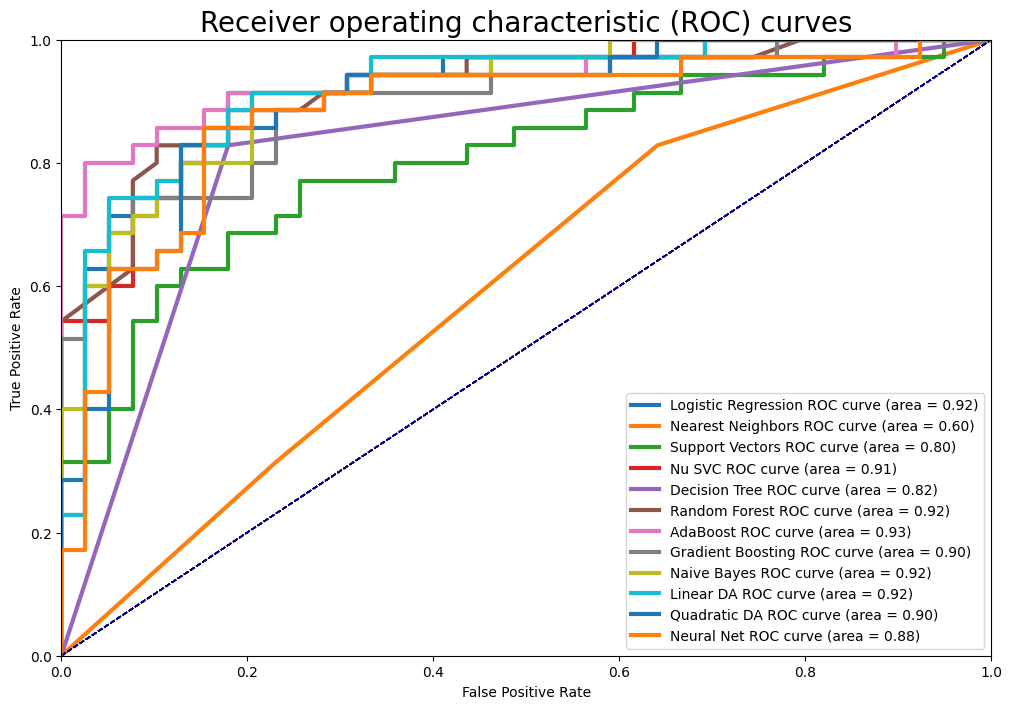

In [51]:
#ROC CURVE
roc_auc_curve(names, classifiers)

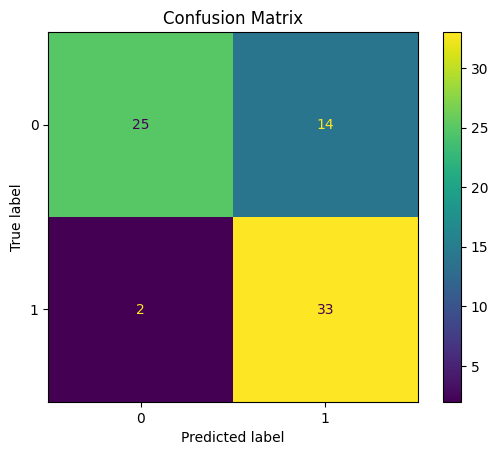

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

# Fit your model first
clf.fit(X_train, y_train)

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf,X_val, y_val)
plt.title("Confusion Matrix")
plt.show()


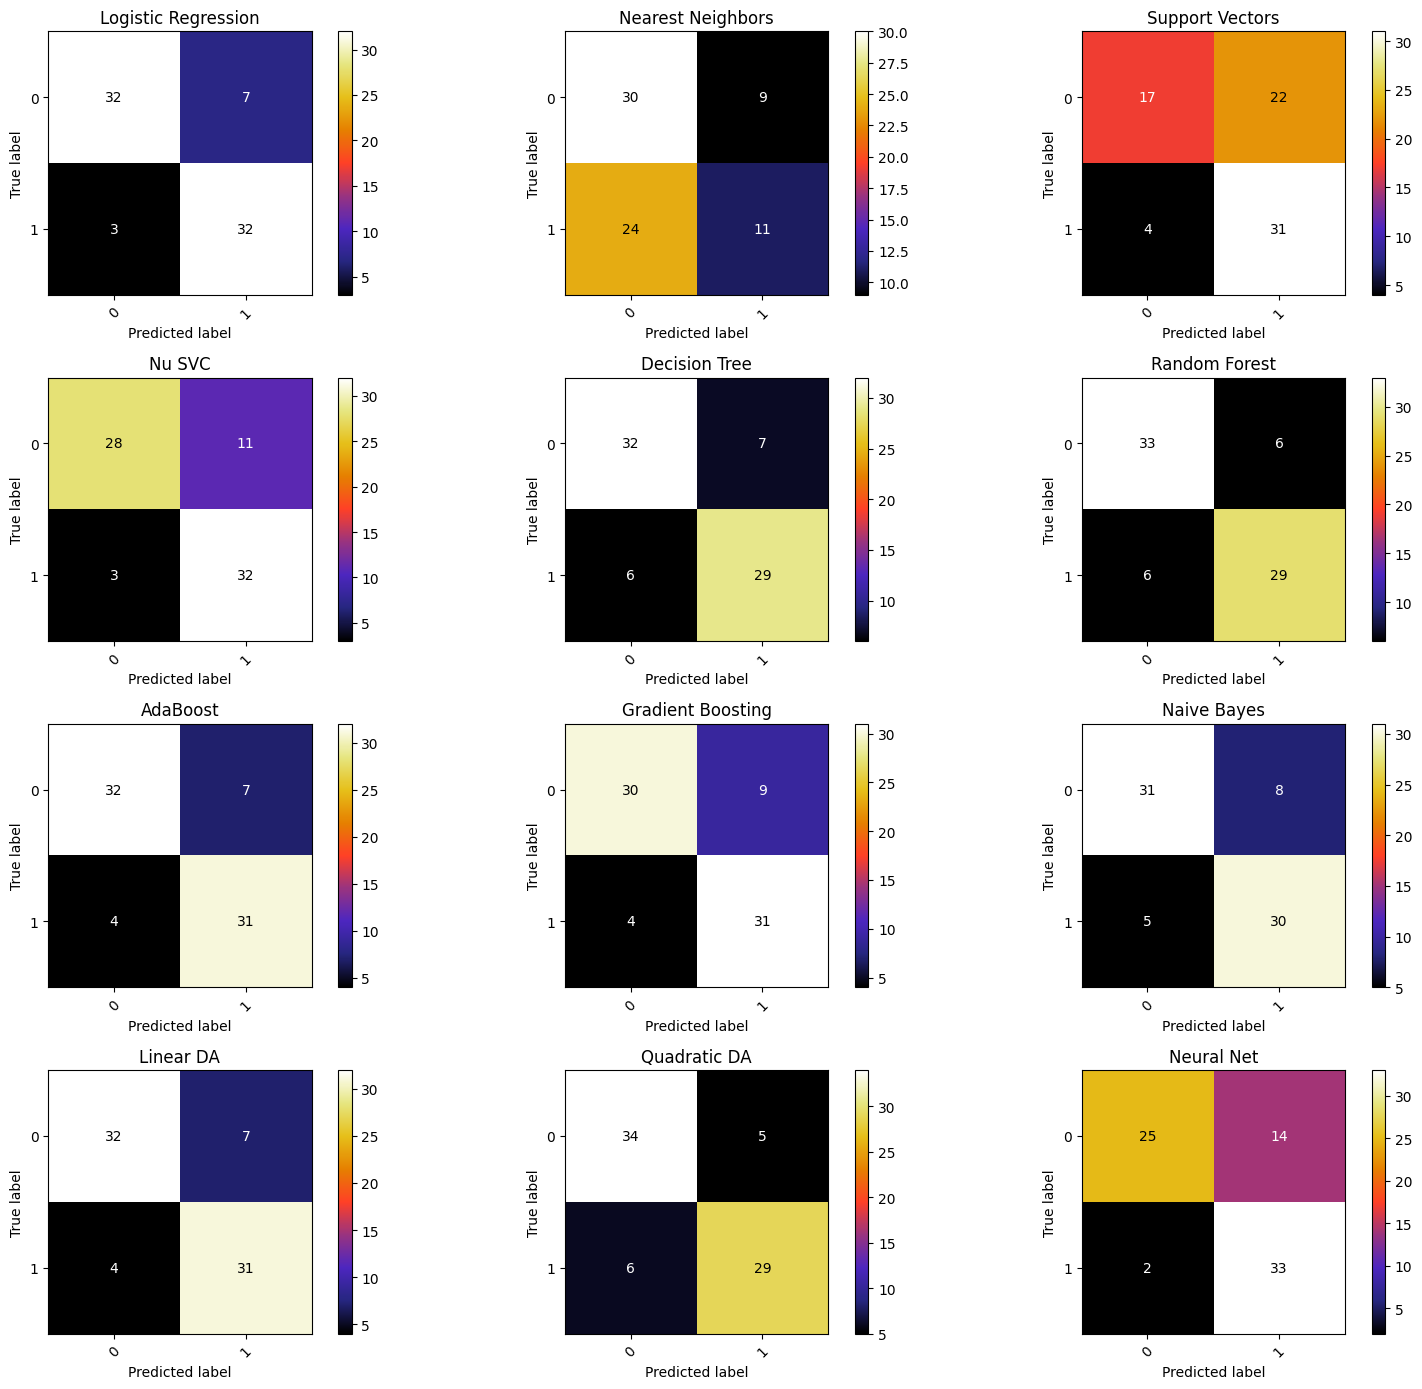

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plot_conf_matrix(names, classifiers, nrows=4, ncols=3, fig_a=12, fig_b=12):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    axes = axes.flatten()

    for i, (name, clf) in enumerate(zip(names, classifiers)):
        clf.fit(X_train, y_train)
        disp = ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, ax=axes[i], cmap='CMRmap')
        axes[i].set_title(name)
        axes[i].tick_params(axis='x', rotation=45)

    # Remove empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.show()
plot_conf_matrix(names, classifiers, nrows=4, ncols=3, fig_a=16, fig_b=14)


Now we have seen all the performance metrics of the classifiers, it is decision time for us to choose the best possible classifier algorithm. **Based on precision LR ranks first (86%)**; whereas if **we see the recall, Neural Nets ranks first with 94%.** I**n the case of precision, QDA ranks first with 85%**. So which one to choose? The F1-score can give us a balance between recall and precision. LR happens to have the best F1-score so we choose Logistic Regression as our best classifier.

Note: If I were consulting a clinic doing a heart disease screening test, I would like to strike a perfect balance between precision and recall (I don't want the clinic to risk their reputation of by handing out too many false positive result but all without risking their clients' health by predicting too many false negatives). Therefore, I would advice them to choose the model which gives a higher F1-score, i.e the Logistic regression model.

**Parameter Tuning (RandomizedSearch): LogisticRegression**
So chosen our best classifier, the Logistic regression model. However, this was achieved with default parameters. The intuition is that we could further improve our model with tuned parameters. Let's see if could achieve that using the scikit-learn RandomizedSearch algorithm.

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr,
                         space,
                         random_state=seed,
                         cv = 5,
                         scoring='f1')

rand_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Hyperparameters: {'C': np.float64(0.2835648865872159), 'penalty': 'l2', 'solver': 'liblinear'}


In [71]:
from sklearn.metrics import classification_report
params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.82      0.91      0.86        35

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.87      0.86      0.86        74



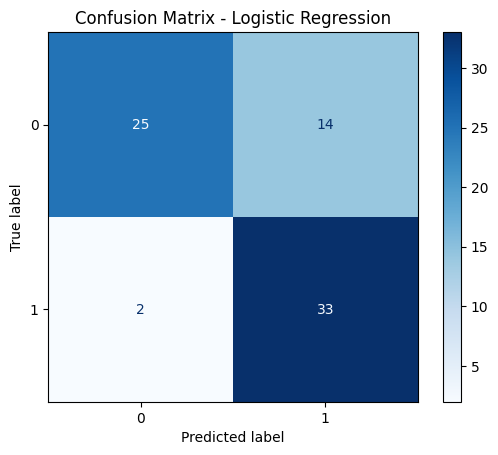

In [75]:
# Predict on validation set
y_pred = clf.predict(X_val)

# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()


Catboost, Lgbm and Xgboost ¶
In the above section we have seen classifiers out of the scikit-learn library. Now we will try the modern (boosted trees) ML algorithms such as the catboost, xgboost and lgbm. They are optimized machine learning algorithms based on the gradient-boosting technique. Depending on the problem at hand, one algorithm is may be better suited than others. For detailed info one can easily refer to their documentations.

In [85]:
!pip install catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names_boost =[
    'Catboost',
    'xgbbost',
    'light GBM'
]
classifiers = [
    CatBoostClassifier(random_state=seed, verbose=0),
    XGBClassifier(objective= 'binary:logistic', random_state=seed),
    LGBMClassifier(random_state=seed)
   ]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [88]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize list to collect results
for name, clf in zip(names_boost, classifiers):
    print(f"Training: {name}")

    # Fit the model
    clf.fit(X_train, y_train)

    # Predict on validation data
    y_pred = clf.predict(X_val)

    # Print results
    print(f"--- {name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    print("-" * 50)


Training: Catboost
--- Catboost Evaluation ---
Accuracy: 0.8378378378378378
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.81      0.86      0.83        35

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74

--------------------------------------------------
Training: xgbbost
--- xgbbost Evaluation ---
Accuracy: 0.7972972972972973
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        39
           1       0.76      0.83      0.79        35

    accuracy                           0.80        74
   macro avg       0.80      0.80      0.80        74
weighted avg       0.80      0.80      0.80        74

--------------------------------------------------
Training: light GBM
--- light GBM Evaluation ---
Accuracy: 0.8243243243243243
              pr

In [89]:
score_summary(names_boost, classifiers,X_val,y_val).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,Recall,Precision,F1,ROC_AUC
0,Catboost,0.837838,0.857143,0.810811,0.833333,0.915751
2,light GBM,0.824324,0.857143,0.789474,0.821918,0.906227
1,xgbbost,0.797297,0.828571,0.763158,0.794521,0.907692


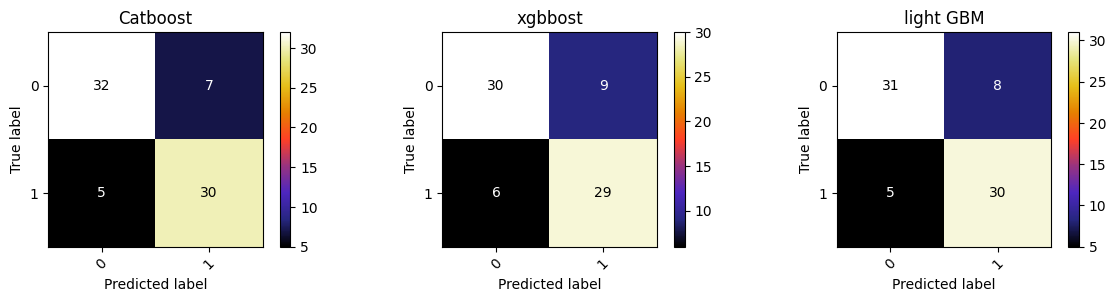

In [90]:
plot_conf_matrix(names=names_boost, classifiers=classifiers, nrows=1, ncols=3, fig_a=12, fig_b=3);

Remark : Here we can see that the lgbm calssifier is marginally better than the other two and we will go for it. Following the same procedure, we will try to tune the parameters in the next section.

# **Parameter Tuning (RandomizedSearch): LGBMClassifier**
Parameter Tuning with RandomizedSearchCV for LGBMClassifier is a method to automatically find the best hyperparameters that improve model performance — like accuracy or F1-score — without manually testing each one.
🔍 What does it do?
RandomizedSearchCV randomly samples from a specified hyperparameter space.

Instead of trying all combinations (like GridSearchCV), it tries a fixed number of random combinations (faster).

It helps optimize the performance of models like LGBMClassifier.
🔍 What does it do?
RandomizedSearchCV randomly samples from a specified hyperparameter space.

Instead of trying all combinations (like GridSearchCV), it tries a fixed number of random combinations (faster).

It helps optimize the performance of models like LGBMClassifier.

📦 LGBMClassifier: Quick Intro
LGBMClassifier is the LightGBM implementation of gradient boosting for classification. It's fast and efficient, especially with large datasets.

✅ Why tune hyperparameters?
LightGBM has many hyperparameters like:

| Hyperparameter     | Meaning                                                         |
| ------------------ | --------------------------------------------------------------- |
| `learning_rate`    | How fast the model learns. Smaller = slower but better learning |
| `num_leaves`       | Max number of leaves in one tree. Controls complexity           |
| `max_depth`        | Maximum depth of trees. Prevents overfitting                    |
| `min_data_in_leaf` | Minimum samples in one leaf                                     |
| `n_estimators`     | Number of boosting rounds (trees)                               |


In [77]:
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV
rs_params = {
    'num_leaves': [20, 100],
    'max_depth': [5, 15],
    'min_data_in_leaf': [80, 120],
}
rs_cv = GridSearchCV(estimator=LGBMClassifier(random_state=seed, verbose=-1),
                           param_grid=rs_params,
                           cv = 5)

rs_cv.fit(X_train, y_train)
params = rs_cv.best_params_
params

{'max_depth': 5, 'min_data_in_leaf': 80, 'num_leaves': 20}

In [79]:
lgbm = LGBMClassifier(**params);

lgbm.fit(X_train, y_train,
        eval_set=(X_val, y_val)
);

print(classification_report(y_val, lgbm.predict(X_val)))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        39
           1       0.80      0.94      0.87        35

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.88      0.86      0.86        74



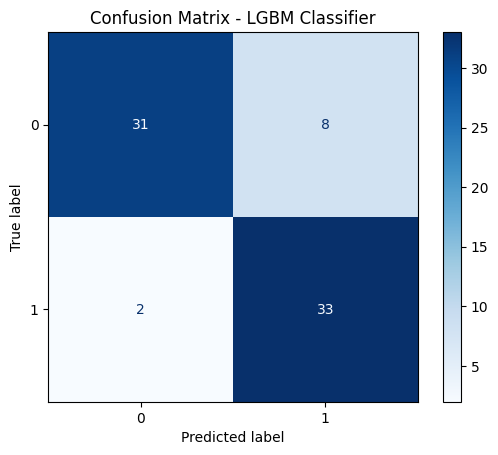

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the validation labels
y_pred = lr.predict(X_val)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(lgbm, X_val, y_val, cmap='Blues')
plt.title("Confusion Matrix - LGBM Classifier")
plt.show()


Remark: In this case (Lgbm) hyper-parameter tuning gave better results than the base model. We have increased the recall value from 86% to 94%. Which means we have decrease the rate of false negatives from 5 cases to 2 in our validation set and we have also decreased the false positive cases by 1. Marginal but we will take every percentage point we can get.

 Model Explainablity :
One of the challenges of a machine leaning project is explaining the model's prediction. A model might consider some features more important than other for its prediction. Another model might weigh other features as more important. Permutation importance and SHAP are two methods one can use to understand which features were selected to have the most impact on our model's prediction.

Permutation importance:
The permutation importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. The procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature [3]. In other words, permutation importance tell us what features have the biggest impact on our model predictions.

In [92]:
!pip install eli5

import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(lgbm, random_state=seed).fit(X_train, y_train)
eli5.show_weights(perm_imp, feature_names = X_val.columns.tolist())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.1 MB/s eta 0:00:00


Weight,Feature
0.0901 ± 0.0127,num_major_vessels
0.0730 ± 0.0276,chest_pain_type
0.0288 ± 0.0340,st_slope
0.0099 ± 0.0175,max_heart_rate_achieved
0.0054 ± 0.0067,st_depression
0 ± 0.0000,exercise_induced_angina
0 ± 0.0000,thalassemia
0 ± 0.0000,fasting_blood_sugar
0 ± 0.0000,resting_electrocardiogram
0 ± 0.0000,sex


**SHAP:**
SHAP, a short name for SHapely Additive ExPlanations, is a method used to explain the output of a machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions [5]. SHAP has a rich functionality (methods) by which we can visualize/interpret the output of our models. Below we use the shap.summary_plot() to identify the impact each feature has on the predicted output.

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


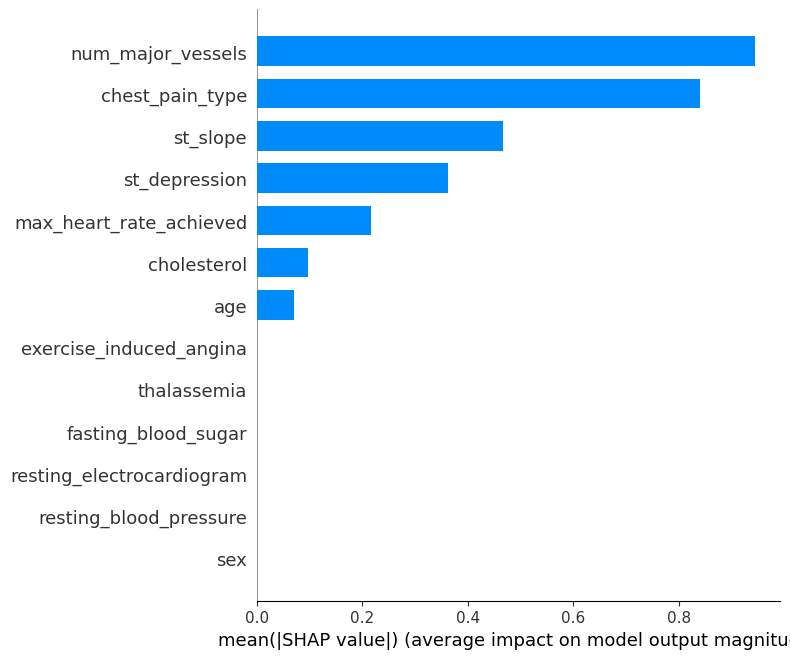

In [98]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val,
                  feature_names=features,
                  plot_type="bar",
                 )

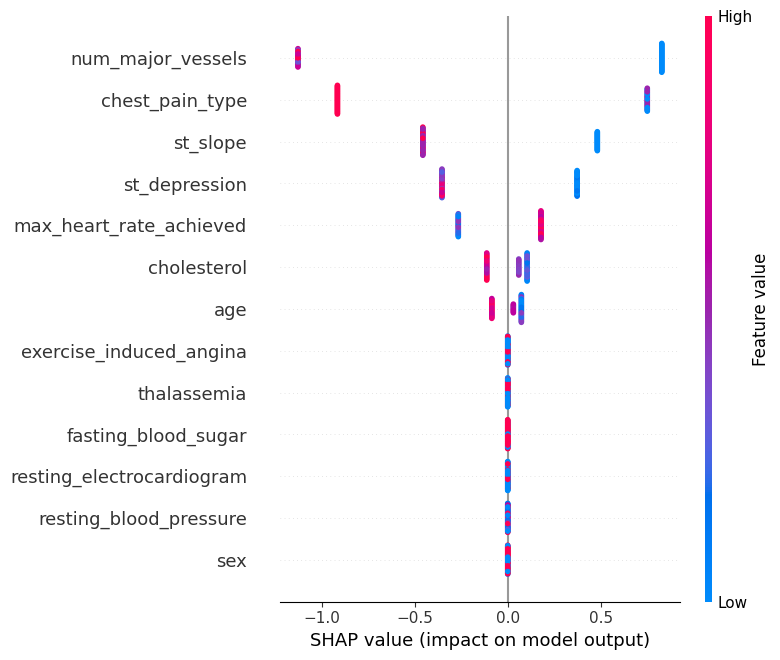

In [100]:
shap.summary_plot(shap_values, X_val)

# **Concluding** **Remark**
At the start of this notebook, we laid out what we wanted to do with this project; to explore the heart disease dataset (EDA) and practice binary classification (modeling). In part one (EDA) we did explore the dataset, did a sanity check and removed some 'faulty' data and other pre-processing. We also tried to identify correlation between features and also with the target variable. In part two we practiced how to set-up binary classifiers; first starting with base models and finally arriving at our best model via hyper-parameter tuning. Some of the highlights are summarized below.

Our best model happens to be LGBM classifier (tuned with randomizedSearch)
According to both eli5 permutation importance and SHAP the three most important features of the model are **num_major_vessels, chest_pain_type, and st_slope.** These features are also among better correlated features from our EDA.
Contrary to my intuition cholesterol happens to be not an important feature for the model (both eli5 and SHAP did not pick this feature as important).
Although it is not shown in this notebook, varying the test/train ratio resulted in different performance metrics for the classifiers we have on our list. So if you change the ratio you might get different results.